# Homework 2

### Libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
#import steam_analysis module to perform operations on the dataset
import steam_analysis as steam

### Load dataset

In [3]:
#dataset filenames
dataset_main = 'dataset/steam_reviews.csv'
dataset_bonus1 = 'dataset/steam_reviews_bonus_1.csv'
dataset_bonus2 = 'dataset/steam_reviews_bonus_2.csv'

In [4]:
#load main dataset
df = pd.read_csv(dataset_main)

In [ ]:
#load bonus dataset
df = pd.concat(pd.read_csv(dataset_bonus1))
df = pd.concat(pd.read_csv(dataset_bonus1))

### DEBUG

In [4]:
#skip the above two cells and run this one instead if you have problems loading the whole dataset
for chunk in pd.read_csv(dataset_main, chunksize=10000000):
    df = chunk
    break

# [RQ1] Exploratory Data Analysis (EDA)

## Description

In [5]:
#print a description of the dataset and a list of its columns
steam.describe_dataset(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned   

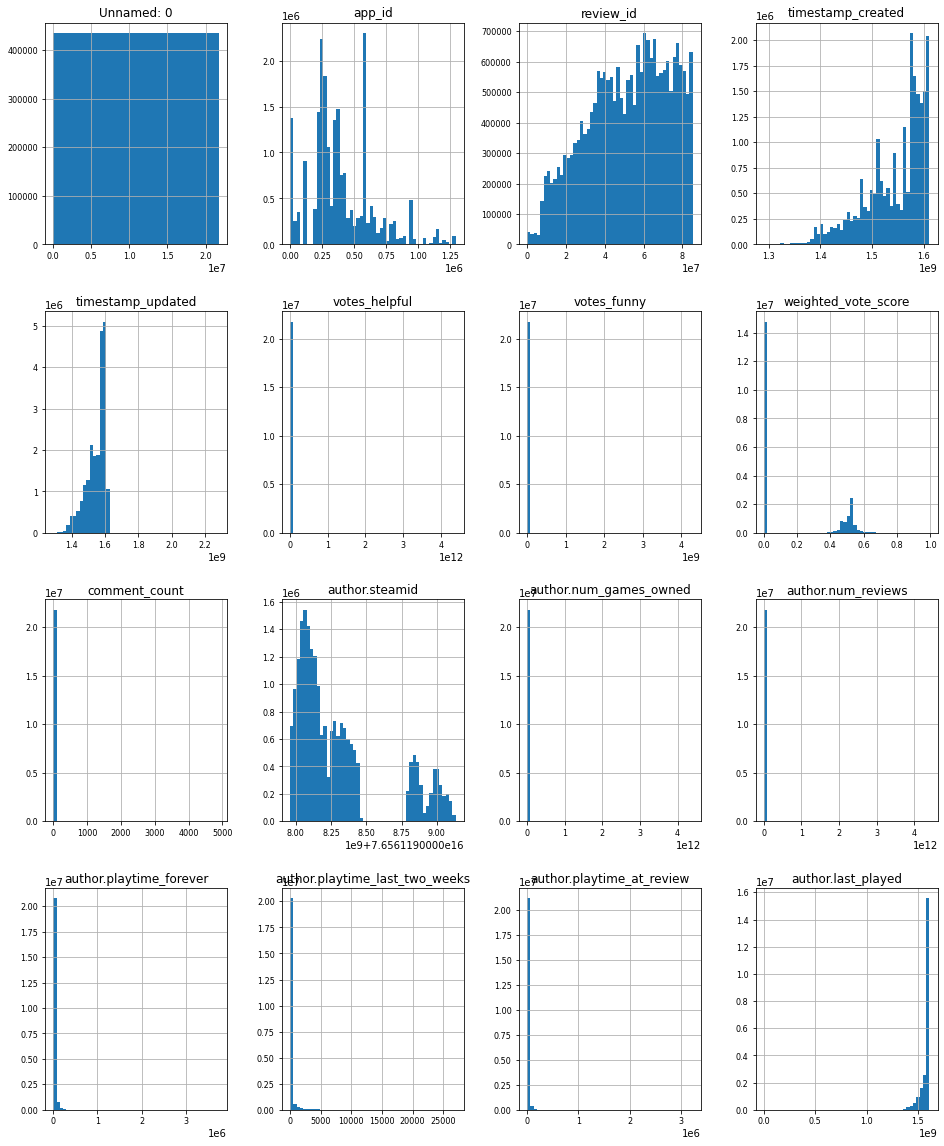

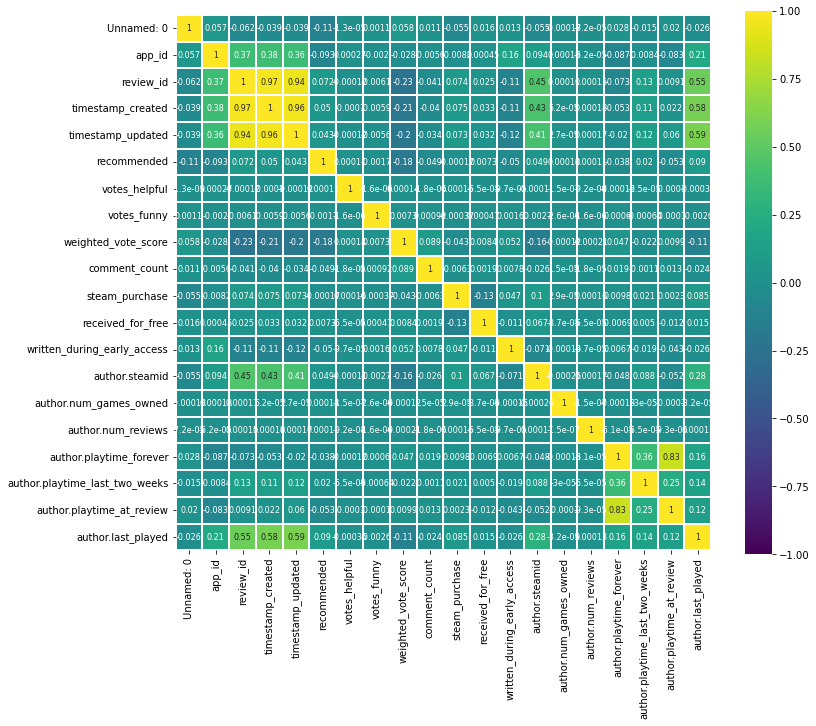

In [6]:
#print a summary analysis of the whole dataset, included a correlation graph
steam.plot_insight_graphs(df)

# [RQ2]

### Plot the number of reviews for each application in descending order.

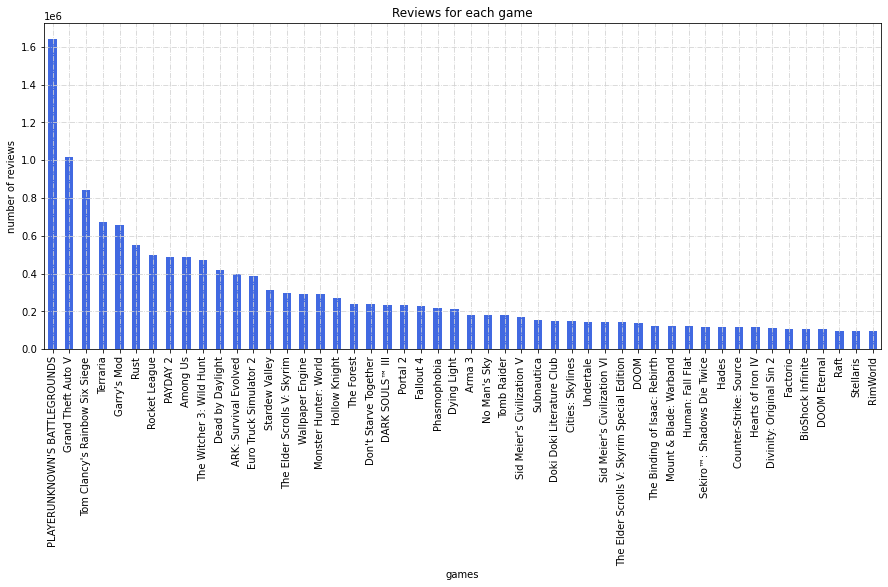

In [7]:
#plot a chart of the number of reviews for each game (for clarity the top 50)
steam.plot_reviews_chart(df, 50)

### What applications have the best Weighted Vote Score?

In [8]:
#print a list of the best weighted vote score
steam.best_weighted_vote_score(df)

app_name
Hunt Down The Freeman    0.502150
Urban Empire             0.438623
METAL GEAR SURVIVE       0.421632
Identity                 0.415384
Umbrella Corps           0.414678
Name: weighted_vote_score, dtype: float64


### Which applications have the most and the least recommendations?

In [9]:
#print the five top recommended games and the five least recommended games
steam.recommendations_summary(df)

Most recommended games: 
app_name
PLAYERUNKNOWN'S BATTLEGROUNDS     886417
Grand Theft Auto V                831311
Tom Clancy's Rainbow Six Siege    742397
Terraria                          658741
Garry's Mod                       632558
Name: recommended, dtype: int64 


Least recommended games: 
app_name
Out of the Park Baseball 19    594
Shadow Complex Remastered      587
Identity                       439
DRAGON QUEST HEROES™ II        423
Neon Hardcorps                  89
Name: recommended, dtype: int64


### How many of these applications were purchased, and how many were given for free?

                       received_for_free  steam_purchase
app_name                                                
20XX                                  51            3204
A Hat in Time                        820           27262
A Short Hike                          99            4566
A Way Out                            296            7416
ARK: Survival Evolved              12046          316015 



Games received for free: 688061/21747371


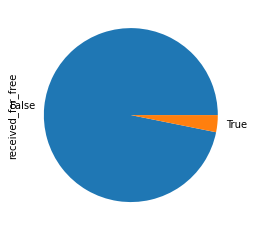

Games purchased: 16842432/21747371


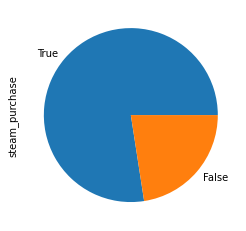

In [10]:
#print a table containing the steam_purchase and received_for_free columns
#print two pie charts: one of the games received for free, one of the games purchased
steam.plot_free_or_purchased(df)

# [RQ3]

### What is the most common time that authors review an application? For example, authors usually write a review at 17:44.

In [11]:
#print most common time at which an application is reviewed
steam.most_common_review_time(df, 5)

14:50
15:05
14:37
15:07
15:04


### Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.

### Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:

  time interval (start, end)  total reviews
0       (06:00:00, 10:59:59)        3925459
1       (11:00:00, 13:59:59)        2971997
2       (14:00:00, 16:59:59)        3377469
3       (17:00:00, 19:59:59)        3257494
4       (20:00:00, 23:59:59)        3617426
5       (00:00:00, 02:59:59)        2351647
6       (03:00:00, 05:59:59)        2245879


<Figure size 432x288 with 0 Axes>

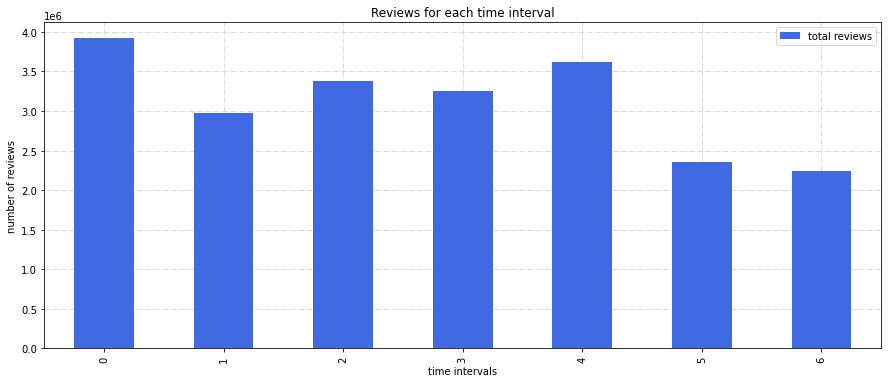

In [12]:
#list of tuple of time intervals as requested in the Research Question (RQ3)
time_intervals = [('06:00:00', '10:59:59'),
('11:00:00', '13:59:59'),
('14:00:00', '16:59:59'),
('17:00:00', '19:59:59'),
('20:00:00', '23:59:59'),
('00:00:00', '02:59:59'),
('03:00:00', '05:59:59')]

#print a bar plot of the number of reviews for each time interval passed
steam.reviews_between_time_intervals(df, time_intervals)


# [RQ4]

In [8]:
from steam_analysis import languages_pie,\
                           count_languages,\
                           sort_count,\
                           print_top_languages,\
                           filter_by_language,\
                           compute_prob,\
                           format_prob

## Top Languages
First, we want to check in what languages most of the reviews are written in.

Let's use a dataframe with only the columns we need, so we can minimise the execution times.

In [6]:
df_rq4 = df[['review_id', 'language', 'votes_funny', 'votes_helpful']]

## What are the most common languages?

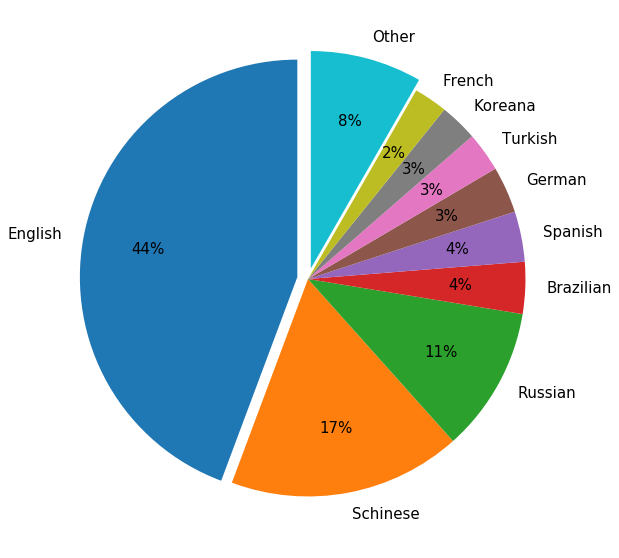

The three most common languages are:
English with 9635437 reviews
Schinese with 3764967 reviews
Russian with 2348900 reviews


In [79]:
languages_pie(df_rq4['language'])

top_languages = sort_count(count_languages(df_rq4))
print_top_languages(top_languages)

### Now let's filter the dataset so it only includes reviews in these languages
How did other users consider these reviews: 'Funny' or 'Helpful'?

In [83]:
filtered_df = filter_by_language(df_rq4, [language for language, _ in top_languages])

11% of the English reviews were considered 'Funny'
29% of the English reviews were considered 'Helpful'

12% of the Schinese reviews were considered 'Funny'
25% of the Schinese reviews were considered 'Helpful'

17% of the Russian reviews were considered 'Funny'
36% of the Russian reviews were considered 'Helpful'



Generally the reviews in Russian seem to attract more interactions **among these three languages**, as they were rated more often either 'Funny' or 'Helpful' than the English or Chinese ones, which were rated similarly. 

# [RQ5]

# [RQ6]

# [RQ7]

In [14]:
from steam_analysis import compute_prob, format_prob, norm_col

sns.set()

Let's use a dataframe with only the columns we need, so we can minimise the execution times.

In [6]:
df_rq7 = df[['review_id', 'votes_funny', 'weighted_vote_score']]

## Weighted Vote Score

We want to know what's the probability of a review having a *WVS* of at least 0.5.

In order to do so, let's take a first look into how these scores are distributed.

In [7]:
df_rq7['weighted_vote_score'].describe()

count    2.174737e+07
mean     1.654424e-01
std      2.434006e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.827586e-01
max      9.959868e-01
Name: weighted_vote_score, dtype: float64

The distribution has a mean of about 0.16, and about 3/4 of the votes are below 0.5. 

This tells us that we should expect a low figure for $\mathcal{P}(score \geq 0.5)$

In order to get a better grasp of this data, we should plot an histogram of the values.

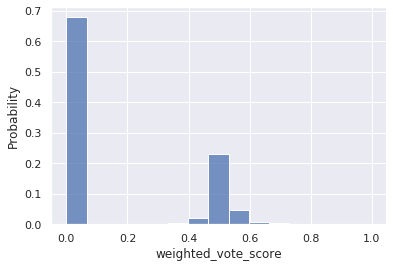

In [190]:
sns.histplot(df_rq7['weighted_vote_score'], bins = 15, stat = "probability")

The vast majority of reviews have a Weighted Vote Score of exactly 0, so instead on working with the entire dataset, let's only focus on those reviews which have a non-zero score.

In [188]:
wvs = df_rq7[df_rq7['weighted_vote_score'] > 0]

print(wvs['weighted_vote_score'].describe())

print("\nThe median is", wvs['weighted_vote_score'].median())

count    6.976357e+06
mean     5.157330e-01
std      6.343698e-02
min      8.186612e-03
25%      4.907975e-01
50%      5.215110e-01
75%      5.238096e-01
max      9.959868e-01
Name: weighted_vote_score, dtype: float64

The median is 0.5215110182762146


Only about 1/3 of the reviews have a non-zero score. The mean now is very close to 0.5 and the distribution is (probability-wise) symmetric about 0.52; as we can visualize from the updated histogram the scores seem normally distributed, although the right tail is heavier than the left one: reviews tend to have a score higher than 0.5 more likely than lower.

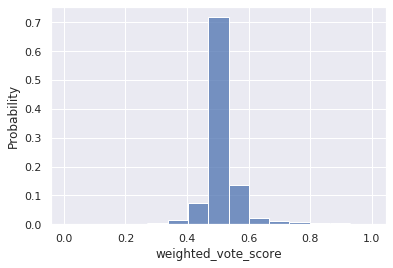

In [189]:
sns.histplot(wvs['weighted_vote_score'], bins = 15, stat = "probability")

To estimate the probability of $\mathcal{P}(score \geq 0.5)$ we can sum up the number of elements contained in each bin in the interval $[0.5, 1.0]$ and then divide the value we get by the total number of binned elements.

This is easily done by operating directly on the dataset.

In [22]:
prob_wvs = compute_prob(wvs, 'weighted_vote_score', 0.5)

print(format_prob(prob_wvs))

68.58%


About 2/3 of the reviews have a Weighted Vote Score of at least 0.5.

On the other hand, by considering the original dataset we would have gotten only about 1/5 of the reviews.

In [23]:
prob_wvs_orig = compute_prob(df_rq7, 'weighted_vote_score', 0.5)

print(format_prob(prob_wvs_orig))

22.00%


## Let's take a deeper look into these reviews

We want to study the correlation between a review having a *WVS* bigger than or equal to 0.5 and it being rated as 'Funny'.

First, let's compute the probability of a review having at least one 'Funny' vote given $WVS \geq 0.5$:

$\mathcal{P}(funny \geq 1\: |\: WVS \geq 0.5)$

We can filter the `wvs` dataframe with non-zero only *WVS's* so it only includes reviews with $WVS \geq 0.5$, and then compute the frequency (the *probability*) __among those__ of reviews that have at least one 'Funny' vote.

In [46]:
prob_wvs_funny = compute_prob(wvs[wvs['weighted_vote_score'] >= 0.5], 'votes_funny', 1)

print(format_prob(prob_wvs_funny))

24.91%


About 1/4 of those reviews have received at least one 'Funny' vote.

### Are these two events independent?

If the probability of a review having $WVS \geq 0.5$ and the probability of it having been rated as 'Funny' by at least one user are independent, then we expect

$\mathcal{P}(WVS \geq 0.5\: \text{and}\: funny \geq 1) = \mathcal{P}(WVS \geq 0.5)\cdot\mathcal{P}(funny \geq 1)$

i.e.

$\mathcal{P}(funny \geq 1\: |\: WVS \geq 0.5) = \frac{\mathcal{P}(WVS \geq 0.5\: \text{and}\: funny \geq 1)}{\mathcal{P}(WVS \geq 0.5)} = \mathcal{P}(funny \geq 1)$

In order to check if this equality holds, let's compute $\mathcal{P}(funny \geq 1)$.

We will filter these reviews out of the dataset which contains only reviews with non-zero *WVS*'s.

In [69]:
prob_funny = compute_prob(wvs, 'votes_funny', 1)

print(format_prob(prob_funny))

25.45%


If we evaluate

In [ ]:
print(format_prob(prob_wvs_funny / prob_funny))

We get a value which is quite close to 1, but not enough to say with reasonable certainty that the two are independent.

Let's plot them and see if we can actually spot any relationship between the *WVS* of a review and the number of 'Funny' votes it received.

We'll get this data by considering only rows of the `wvs` dataframe which have both $WVS\geq0.5$ and at least one 'Funny' vote, so we can actually compare values out of the same reviews.

**Remark:** for this analysis we will only consider reviews with at most 100 'Funny' votes, since they are the vast majority and so we can certainly exclude reviews with a suspiciously large number of votes.

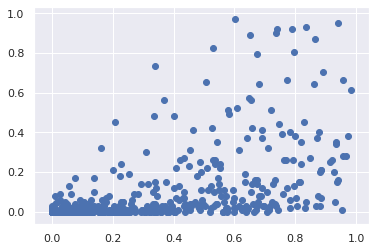

In [184]:
wvs_funny = wvs[(wvs['weighted_vote_score'] >= 0.5) 
                 & (wvs['votes_funny'] >= 1) 
                 & (wvs['votes_funny'] <= 100)]

# We normalize the values so they are between 0 and 1
wvs_norm = norm_col(wvs_funny['weighted_vote_score'])
funny_norm = norm_col(wvs_funny['votes_funny'])

plt.scatter(wvs_norm[:1000], funny_norm[:1000])

By plotting only the first 1000 values we can see *some* linear relationship.

If we compute the linear relationship of all filtered values we do in fact get a value of

In [183]:
print(wvs_norm.corr(funny_norm))

0.5161788195426803


# [RQ8]

### Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.

In [13]:
df_group_1 = df.groupby(['language'])

In [14]:
df_one = df[['language', 'weighted_vote_score']]
russian_weight = df_one[df_one['language'] == 'russian'].weighted_vote_score.mean()
chinese_weight = df_one[df_one['language'] == 'chinese'].weighted_vote_score.mean()
print(russian_weight, chinese_weight)

0.21352930609861767 nan


### Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.

,author.playtime_at_review,weighted_vote_score
author.playtime_at_review,1.000000,0.009929
weighted_vote_score,0.009929,1.000000


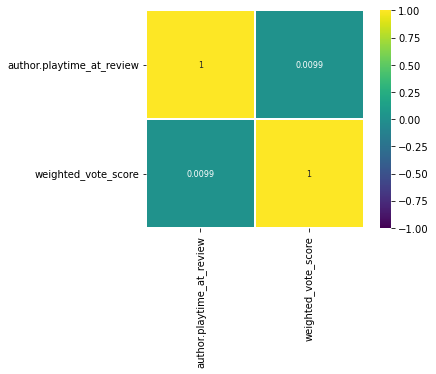

In [15]:
df_corr = df[['author.playtime_at_review', 'weighted_vote_score']]
corr = df_corr.corr(method='pearson')
sns.heatmap(corr, cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
 annot=True, annot_kws={"size": 8}, square=True)
corr

### What are histograms, bar plots, scatterplots and pie charts used for?

..............................................................................

### Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

..............................................................................